An Insight into the Hub of Developers.¶
Who are the developers?
Developer Experience
Education - Level, Major
Career - Employment, Job Satisfaction, Job Seeker
Opinion on open-source software

Analysis of Stack Overflow Developer Survey 2020

Our datasets were obtained from two CSV files which contained the outcome of an online Stackoverflow survey that was completed by many programmers from different parts of the world in 2020. The CSV files were downloaded from Kaggle.com, a public data source.

In [83]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
#Read the primary dataset, which is the CSV file with a larger size as can be seen in the source folder
devsurvey_df = pd.read_csv('survey_results_public.csv')

In [4]:
devsurvey_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The survey had over 60,000 entries and each respondent was asked a total of 60 questions (if we ignore the "Respondent" column).

In [6]:
#Confirming that none of the respondents completed or was allowed to complete the survey more than once
print(devsurvey_df.duplicated().sum())

0


In [13]:
#View the summary of statistics of the primary dataset

#View the summary with respect to numerical columns
devsurvey_df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [14]:
#View the all the column headers which actually contain all the questions
devsurvey_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [9]:
#Read the secondary dataset from the other CSV file
survey_results_df = pd.read_csv('survey_results_schema.csv')

#View the secondary dataset
survey_results_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


As expected, the other file contains details of the Questions. From the table immediately above, we can see that "Column" contains all the column headers in the primary dataset and "QuestionText" contains the details (or explanation) of all the abbreviated column headers.

Data Cleaning

We will now obtain an insight into "Who the programmers (or respondents) are", "What they do" and "Where they come from".

In [10]:
#Choose the columns you need for your analysis
columns_used = [
    # Who they are 
    'Respondent','MainBranch','Gender','Ethnicity','EdLevel','Age','UndergradMajor',
    #What they do 
    'Hobbyist','Age1stCode','ConvertedComp','WebframeWorkedWith','WorkWeekHrs','DatabaseWorkedWith','DevType','Employment','JobFactors','LanguageWorkedWith','YearsCode','YearsCodePro',
    #Where do they come from 
    'Country'
]

In [11]:
#Check the total length or number of columns
len(columns_used)

20

In [16]:
#Create a new dataset containing only the necessary columns from the primary dataset
new_devsurvey_df = devsurvey_df[columns_used].copy()
new_devsurvey_df

,Respondent,MainBranch,Gender,Ethnicity,EdLevel,Age,UndergradMajor,Hobbyist,Age1stCode,ConvertedComp,WebframeWorkedWith,WorkWeekHrs,DatabaseWorkedWith,DevType,Employment,JobFactors,LanguageWorkedWith,YearsCode,YearsCodePro,Country
0,1,I am a developer by profession,Man,White or of European descent,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Computer science, computer engineering, or sof...",Yes,13,NaN,ASP.NET;ASP.NET Core,50.0,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Independent contractor, freelancer, or self-em...","Languages, frameworks, and other technologies ...",C#;HTML/CSS;JavaScript,36,27,Germany
1,2,I am a developer by profession,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Computer science, computer engineering, or sof...",No,19,NaN,NaN,NaN,NaN,"Developer, full-stack;Developer, mobile",Employed full-time,NaN,JavaScript;Swift,7,4,United Kingdom
2,3,I code primarily as a hobby,NaN,NaN,NaN,NaN,NaN,Yes,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,4,NaN,Russian Federation
3,4,I am a developer by profession,Man,White or of European descent,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25.0,"Computer science, computer engineering, or sof...",Yes,18,NaN,NaN,40.0,NaN,NaN,NaN,Flex time or a flexible schedule;Office enviro...,NaN,7,4,Albania
4,5,"I used to be a developer by profession, but no...",Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",31.0,"Computer science, computer engineering, or sof...",Yes,16,NaN,Ruby on Rails,NaN,MySQL;PostgreSQL;Redis;SQLite,NaN,Employed full-time,NaN,HTML/CSS;Ruby;SQL,15,8,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Computer science, computer engineering, or sof...",Yes,16,NaN,NaN,NaN,NaN,Senior executive/VP,Employed full-time,NaN,NaN,10,Less than 1 year,United States
64457,64867,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...,NaN,Employed full-time,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Morocco
64458,64898,NaN,NaN,NaN,Primary/elementary school,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Viet Nam
64459,64925,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Oracle,NaN,Employed full-time,NaN,HTML/CSS,NaN,NaN,Poland


In [28]:
new_devsurvey_df.isnull().sum()

Respondent                0
MainBranch              299
Gender                13904
Ethnicity             18513
EdLevel                7030
Age                   19015
UndergradMajor        13466
Hobbyist                 45
Age1stCode             6561
ConvertedComp         29705
WebframeWorkedWith    22182
WorkWeekHrs           23310
DatabaseWorkedWith    14924
DevType               15091
Employment              607
JobFactors            15112
LanguageWorkedWith     7083
YearsCode              6777
YearsCodePro          18112
Country                 389
dtype: int64

In [29]:
#drop rows with null values
newer_devsurvey_df = new_devsurvey_df.dropna()  

In [30]:
newer_devsurvey_df

,Respondent,MainBranch,Gender,Ethnicity,EdLevel,Age,UndergradMajor,Hobbyist,Age1stCode,ConvertedComp,WebframeWorkedWith,WorkWeekHrs,DatabaseWorkedWith,DevType,Employment,JobFactors,LanguageWorkedWith,YearsCode,YearsCodePro,Country
7,8,I am a developer by profession,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36.0,"Computer science, computer engineering, or sof...",Yes,12,116000.0,Flask,39.0,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...",Employed full-time,Remote work options;Opportunities for professi...,Python;SQL,17,13,United States
9,10,I am a developer by profession,Man,White or of European descent,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22.0,Mathematics or statistics,Yes,14,32315.0,Flask;jQuery,36.0,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...",Employed full-time,Flex time or a flexible schedule;How widely us...,HTML/CSS;Java;JavaScript;Python;SQL,8,4,United Kingdom
10,11,I am a developer by profession,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.0,"Computer science, computer engineering, or sof...",Yes,13,40070.0,Angular;Angular.js;Django;React.js,40.0,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...",Employed full-time,"Flex time or a flexible schedule;Languages, fr...",C#;JavaScript;Swift,10,2,United Kingdom
13,14,I am a developer by profession,Man,White or of European descent,"Associate degree (A.A., A.S., etc.)",27.0,"Computer science, computer engineering, or sof...",Yes,13,66000.0,Angular;Vue.js,40.0,Firebase;Microsoft SQL Server,"Developer, desktop or enterprise applications;...",Employed full-time,Industry that I’d be working in;Flex time or a...,HTML/CSS;JavaScript;SQL;TypeScript,5,1,United States
15,16,I am a developer by profession,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",45.0,"Computer science, computer engineering, or sof...",Yes,8,108576.0,jQuery;React.js,50.0,PostgreSQL,"Database administrator;Developer, back-end;Dev...","Independent contractor, freelancer, or self-em...",Industry that I’d be working in;Diversity of t...,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,37,23,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62016,63311,I am a developer by profession,Man,White or of European descent,"Associate degree (A.A., A.S., etc.)",27.0,"Computer science, computer engineering, or sof...",Yes,16,109956.0,Angular;ASP.NET Core,80.0,Microsoft SQL Server,"Developer, full-stack;DevOps specialist","Independent contractor, freelancer, or self-em...","Flex time or a flexible schedule;Languages, fr...",C#;HTML/CSS;JavaScript;SQL;TypeScript,8,7,Brazil
62212,63516,I am a developer by profession,Man,Southeast Asian,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",30.0,"Another engineering discipline (such as civil,...",Yes,21,38724.0,ASP.NET;jQuery,9.0,Microsoft SQL Server,"Developer, full-stack",Employed full-time,"Languages, frameworks, and other technologies ...",C#;HTML/CSS;JavaScript;SQL,3,5,Singapore
63402,64810,I am a developer by profession,Man,White or of European descent,Some college/university study without earning ...,32.0,"Computer science, computer engineering, or sof...",Yes,12,74500.0,Angular;ASP.NET Core;Django;jQuery,35.0,MariaDB;Microsoft SQL Server;MySQL,"Database administrator;Developer, back-end;Dev...",Employed full-time,"Flex time or a flexible schedule;Languages, fr...",Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,19,7,United States
63517,64938,I am a developer by profession,Woman,White or of European descent,"Professional degree (JD, MD, etc.)",33.0,"Computer science, computer engineering, or sof...",No,13,59454.0,Django;Flask;jQuery;Ruby on Rails,40.0,DynamoDB;Elasticsearch;MongoDB;MySQL;Oracle;Po...,"Developer, back-end;DevOps specialist",Employed full-time,Flex time or a flexible schedule;Office enviro...,Assembly;C;C++;HTML/C

we now have 18,241 rows (or respondent entries) and all of them are without missing values.

In [31]:
#View the statistical summary of the newer primary dataset to make useful observations
newer_devsurvey_df.describe()

,Respondent,Age,ConvertedComp,WorkWeekHrs
count,18241.000000,18241.000000,1.824100e+04,18241.000000
mean,28388.710652,31.833797,1.038853e+05,40.570651
std,18556.638953,8.089524,2.277009e+05,15.526661
min,8.000000,15.000000,0.000000e+00,1.000000
25%,12890.000000,26.000000,2.659900e+04,40.000000
50%,25474.000000,30.000000,5.467200e+04,40.000000
75%,46891.000000,36.000000,9.573600e+04,42.000000
max,65414.000000,279.000000,2.000000e+06,475.000000


From the summary above, the maximum "Age" is 279 and the maximum "WorkWeekHrs" is 475. It is unlikely for any living human to be 279 years old in this time. Likewise, it is impossible for a person to work for more than 168 hours per week, if they are ever able to work continuously without sleep or any interruption. We will therefore drop all the rows containing ages greater than 60 (years) and those containing work week hours greater than 133 for the purpose of our analysis.

In [42]:
#Ignore rows that have entry values for column "Age" greater than 60
#To clear the warning that is showing or may show after you run the code in this cell, rerun just this cell once or twice
newer_devsurvey_df.drop(newer_devsurvey_df[newer_devsurvey_df['Age'] > 60].index, inplace=True)
newer_devsurvey_df.head(15)

C:\Users\Benjamin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Respondent,MainBranch,Gender,Ethnicity,EdLevel,Age,UndergradMajor,Hobbyist,Age1stCode,ConvertedComp,WebframeWorkedWith,WorkWeekHrs,DatabaseWorkedWith,DevType,Employment,JobFactors,LanguageWorkedWith,YearsCode,YearsCodePro,Country
7,8,I am a developer by profession,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36.0,"Computer science, computer engineering, or sof...",Yes,12,116000.0,Flask,39.0,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...",Employed full-time,Remote work options;Opportunities for professi...,Python;SQL,17,13,United States
9,10,I am a developer by profession,Man,White or of European descent,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22.0,Mathematics or statistics,Yes,14,32315.0,Flask;jQuery,36.0,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...",Employed full-time,Flex time or a flexible schedule;How widely us...,HTML/CSS;Java;JavaScript;Python;SQL,8,4,United Kingdom
10,11,I am a developer by profession,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.0,"Computer science, computer engineering, or sof...",Yes,13,40070.0,Angular;Angular.js;Django;React.js,40.0,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...",Employed full-time,"Flex time or a flexible schedule;Languages, fr...",C#;JavaScript;Swift,10,2,United Kingdom
13,14,I am a developer by profession,Man,White or of European descent,"Associate degree (A.A., A.S., etc.)",27.0,"Computer science, computer engineering, or sof...",Yes,13,66000.0,Angular;Vue.js,40.0,Firebase;Microsoft SQL Server,"Developer, desktop or enterprise applications;...",Employed full-time,Industry that I’d be working in;Flex time or a...,HTML/CSS;JavaScript;SQL;TypeScript,5,1,United States
15,16,I am a developer by profession,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",45.0,"Computer science, computer engineering, or sof...",Yes,8,108576.0,jQuery;React.js,50.0,PostgreSQL,"Database administrator;Developer, back-end;Dev...","Independent contractor, freelancer, or self-em...",Industry that I’d be working in;Diversity of t...,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,37,23,United Kingdom
16,17,I am a developer by profession,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25.0,"Computer science, computer engineering, or sof...",Yes,14,79000.0,ASP.NET;Gatsby;jQuery;React.js;Vue.js,40.0,Microsoft SQL Server;PostgreSQL,"Developer, full-stack",Employed full-time,"Industry that I’d be working in;Languages, fra...",C#;HTML/CSS;JavaScript;Python;SQL;VBA,7,3,United States
18,19,I am a developer by profession,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24.0,"Computer science, computer engineering, or sof...",No,15,83400.0,Angular;Angular.js;ASP.NET Core,35.0,MariaDB;Microsoft SQL Server,"Developer, full-stack",Employed full-time,Flex time or a flexible schedule;Office enviro...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,9,3,United States
32,33,I am a developer by profession,Man,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",39.0,"Computer science, computer engineering, or sof...",Yes,14,63564.0,Angular;Angular.js;Django;Express;React.js,40.0,MongoDB;MySQL;PostgreSQL;SQLite,"Developer, front-end;Developer, full-stack;Dev...",Employed full-time,Flex time or a flexible schedule;Remote work o...,HTML/CSS;JavaScript;TypeScript,20,14,Belgium
35,36,"I am not primarily a developer, but I write co...",Man,White or of European descent,Some college/university study without earning ...,34.0,"Computer science, computer engineering, or sof...",Yes,30,77556.0,Express;React.js,40.0,IBM DB2;Microsoft SQL Server;MongoDB;SQLite,Data or business analyst;Data scientist or mac...,Employed full-time,Flex time or a flexible schedule;Office enviro...,C#;Go;HTML/CSS;Java;JavaScript;Python;R;SQL,4,3,United Kingdom
37,38,I am a de

In [43]:
newer_devsurvey_df.describe()

,Respondent,Age,ConvertedComp,WorkWeekHrs
count,18158.000000,18158.000000,1.815800e+04,18158.000000
mean,28403.122425,31.661543,1.035905e+05,40.569294
std,18548.894544,7.515381,2.275053e+05,15.542892
min,8.000000,15.000000,0.000000e+00,1.000000
25%,12908.250000,26.000000,2.648700e+04,40.000000
50%,25487.500000,30.000000,5.448000e+04,40.000000
75%,46881.000000,36.000000,9.500000e+04,42.000000
max,65414.000000,60.000000,2.000000e+06,475.000000


In [45]:
#Ignore rows that have entry values for column "WorkWeekHrs" greater than 133
#To clear the warning that is showing or may show after you run the code in this cell, rerun just this cell once or twice
newer_devsurvey_df.drop(newer_devsurvey_df[newer_devsurvey_df.WorkWeekHrs > 133].index, inplace=True)

C:\Users\Benjamin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
#Check the outcome of ignoring the rows with unrealistic entries for WorkWeekHrs
newer_devsurvey_df.describe()

,Respondent,Age,ConvertedComp,WorkWeekHrs
count,18107.000000,18107.000000,1.810700e+04,18107.000000
mean,28394.627106,31.663296,1.036626e+05,39.994435
std,18554.024994,7.518955,2.276448e+05,9.476259
min,8.000000,15.000000,0.000000e+00,1.000000
25%,12896.500000,26.000000,2.649600e+04,40.000000
50%,25479.000000,30.000000,5.448000e+04,40.000000
75%,46880.000000,36.000000,9.500000e+04,42.000000
max,65414.000000,60.000000,2.000000e+06,130.000000


From the output immediately above, the maximum WorkWeekHrs is now 130 which is less than the 133 that we used as a benchmark. Therefore the change has been applied

From the table immediately above, we now have 18,107 applicable respondents. However, the "LanguageWorkedWith" column contains multiple values which we would like to seperate and properly analyze. So, we will work on splitting that column.

In [48]:
#Check summary of the types of programming languages worked with and those to be worked within the past or coming year 
print(newer_devsurvey_df['LanguageWorkedWith'].value_counts())

C#;HTML/CSS;JavaScript;SQL                                                                                   446
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                        421
HTML/CSS;JavaScript;PHP;SQL                                                                                  391
HTML/CSS;JavaScript;TypeScript                                                                               239
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL;TypeScript                                                  219
                                                                                                            ... 
C#;HTML/CSS;Java;JavaScript;R;SQL                                                                              1
Bash/Shell/PowerShell;JavaScript;Kotlin;Python;SQL                                                             1
Bash/Shell/PowerShell;C;C#;Go;HTML/CSS;Java;JavaScript;Kotlin;Objective-C;Rust;Scala;SQL;Swift;T

Unfortunately, we cannot ascertain the actual number of unique programming languages involved from the summary immediately above. So, we will create a function that will help us split the LanguageWorkedWith column and let us know how many unique programming languages were selected.

In [49]:
#Create a function that turns a column containing a list of values into a DataFrame with one column for each possible option
def split_multicolumn(col_series):
    result_df = col_series.to_frame() #to convert series to dataframe
    options = []
    #Iterate over the column
    for idx, value in col_series[col_series.notnull()].iteritems():
        #Break each value into a list of options
        for option in value.split(';'):
            #Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            #Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [51]:
#Create a new DataFrame from the newer_pry_df DataFrame by applying the new function that was created to newer_pry_df
LanguageWorkedWith_df = split_multicolumn(newer_devsurvey_df.LanguageWorkedWith)

In [53]:
#View the resulting DataFrame you have just created
LanguageWorkedWith_df

,Python,SQL,HTML/CSS,Java,JavaScript,C#,Swift,TypeScript,Bash/Shell/PowerShell,Kotlin,...,C,C++,Scala,PHP,Perl,Assembly,Objective-C,Dart,Haskell,Julia
7,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,False,True,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,True,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62016,False,True,True,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
62212,False,True,True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63402,True,True,True,False,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
63517,True,True,True,True,True,False,False,False,False,False,...,True,True,False,True,False,True,False,False,False,False


In the table immediately above (LangauageWorkedWith_df) which contains all the unique entries under the LanguageWorkedWith column of the newer_pry_df DataFrame, there is one column for each programming language. If a respondent (surveyed programmer) has indicated that they have worked with a particular programming language, the corresponding column value is True. Otherwise, it is False.

We can also see from the table immediately above that the respondents have worked with 25 programming languages in all.

In [54]:
#Check the usage distribution of the 25 programming langaguages among the 18,107 respondents involved in our analysis
Total_LanguageWorkedWith = LanguageWorkedWith_df.sum().sort_values(ascending=False)
Total_LanguageWorkedWith

JavaScript               15121
HTML/CSS                 13362
SQL                      12118
Python                    7564
Java                      7147
Bash/Shell/PowerShell     7071
C#                        6848
TypeScript                6787
PHP                       5142
C++                       2809
C                         2399
Go                        1903
Ruby                      1805
Kotlin                    1411
VBA                       1039
Swift                      865
R                          807
Rust                       807
Scala                      779
Assembly                   644
Dart                       608
Objective-C                595
Perl                       538
Haskell                    284
Julia                       90
dtype: int64

3  2. Data Visualization
3.1  Who are the developers?
3.1.1  Country

In [95]:
#top countries
countries=newer_devsurvey_df['Country'].value_counts(normalize=True)*100
countries = countries.to_frame(name='percentage').reset_index()
top_countries = countries.head(20)

In [96]:
country_counts = newer_devsurvey_df.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df

,Country,Count
0,United States,4474
1,United Kingdom,1339
2,Germany,1047
3,India,1028
4,Canada,728
...,...,...
143,Côte d'Ivoire,1
144,Brunei Darussalam,1
145,Lesotho,1
146,Uzbekistan,1


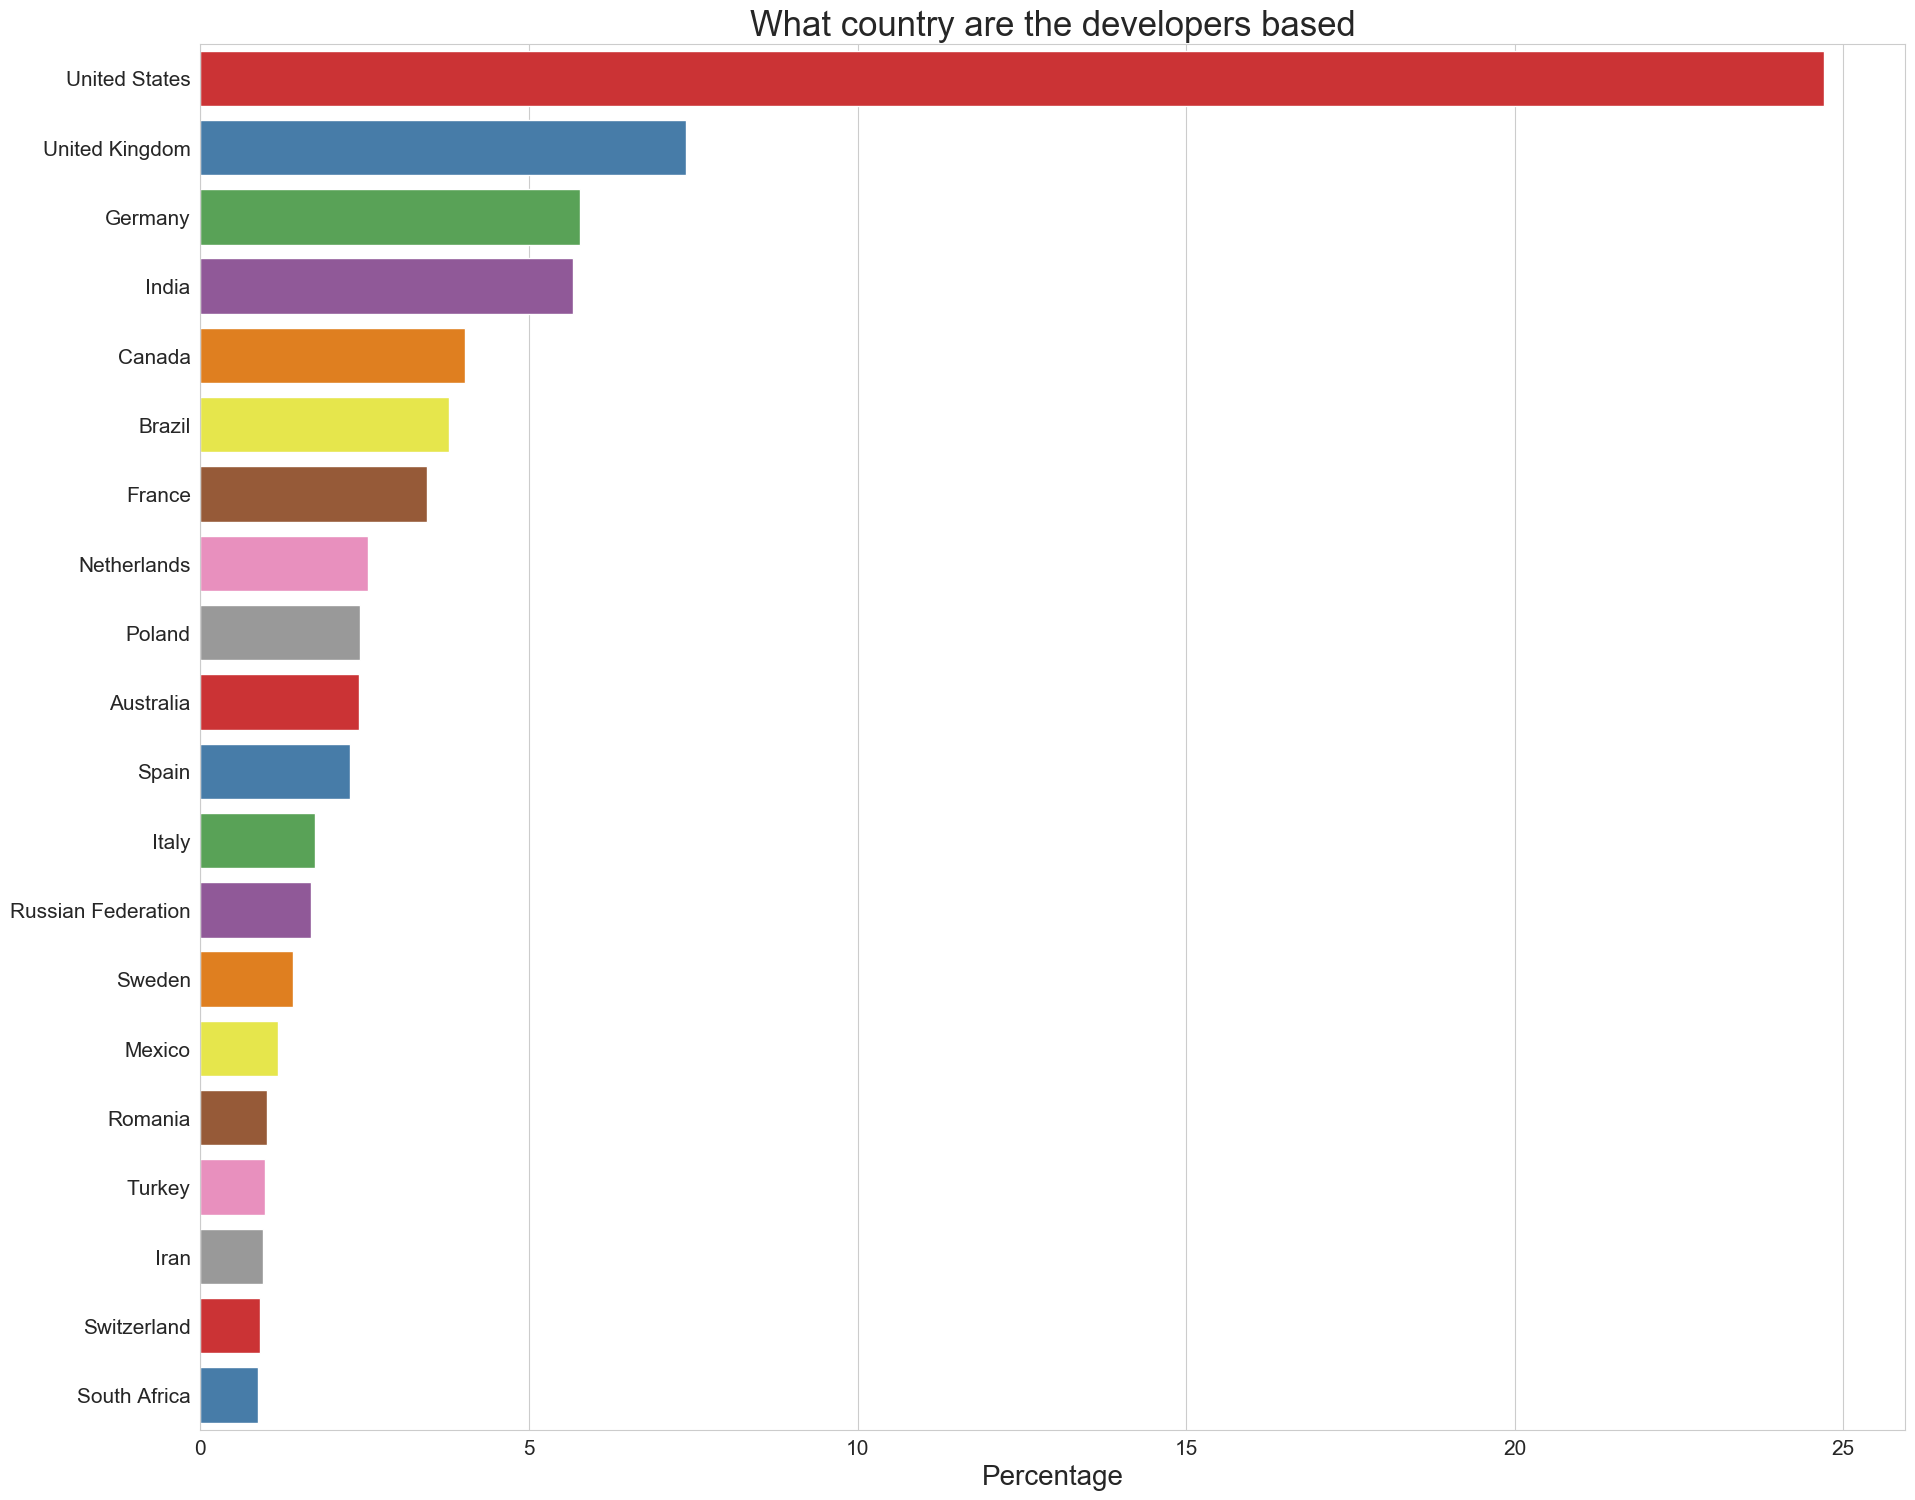

In [112]:
#create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(22,18))
ax = sns.barplot(x='percentage', y='index', data=top_countries, ci=None, palette='Set1',orient='h')
ax.set_title('What country are the developers based', fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

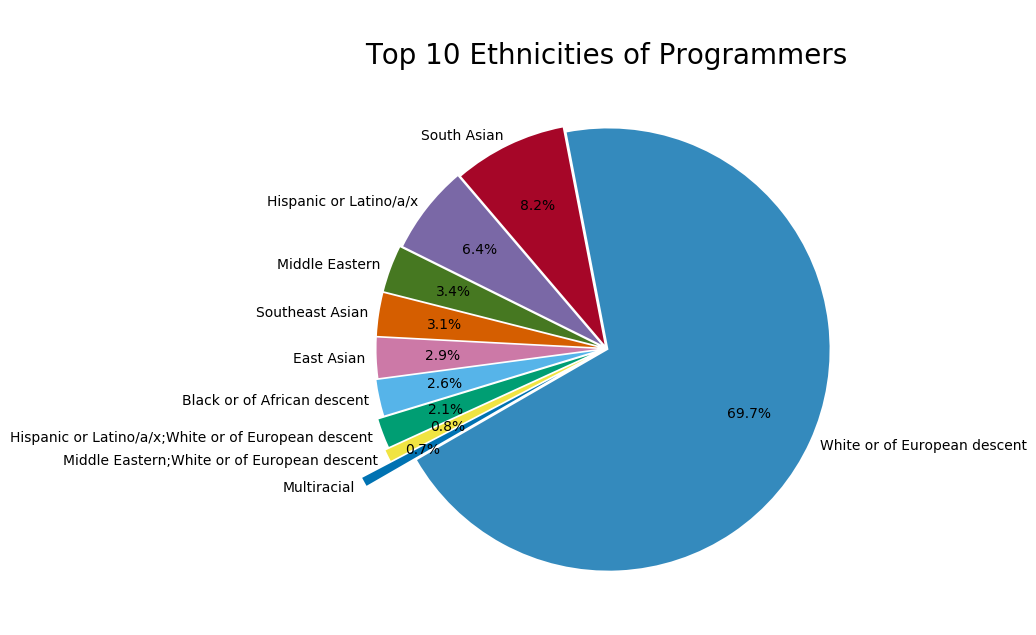

In [115]:
plt.style.use('bmh')

dft = newer_devsurvey_df.groupby(['Ethnicity']).count().sort_values('Respondent', ascending=False)
races = [str(x) for x in dft.index[0:10]]
pies = [dft.Respondent[dft.index==races[x]][0] for x in range(10)]

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(
    pies,
    labels=races,
    autopct='%.1f%%',
    explode=[0.01, 0.02, 0.03, 0.04, 0.04, 0.04, 0.05, 0.08, 0.1, 0.25],
    startangle=-150, pctdistance=0.7, labeldistance=1.05
)
ax.set_title('\nTop 10 Ethnicities of Programmers',fontdict={'fontsize':20})
fig.tight_layout()
fig.savefig('1.png', dpi=200, bbox_inches='tight')
plt.show()
plt.style.use('default')

In [123]:
gender = split_multicolumn(newer_devsurvey_df.Gender)
gender

,Man,Woman,"Non-binary, genderqueer, or gender non-conforming"
7,True,False,False
9,True,False,False
10,True,False,False
13,True,False,False
15,True,False,False
...,...,...,...
62016,True,False,False
62212,True,False,False
63402,True,False,False
63517,False,True,False


In [124]:
gender_percent = gender.mean().sort_values(ascending=False) * 100
gender_percent= gender_percent.to_frame(name='percentage').reset_index()
gender_percent

,index,percentage
0,Man,92.417297
1,Woman,6.969680
2,"Non-binary, genderqueer, or gender non-conforming",1.115591


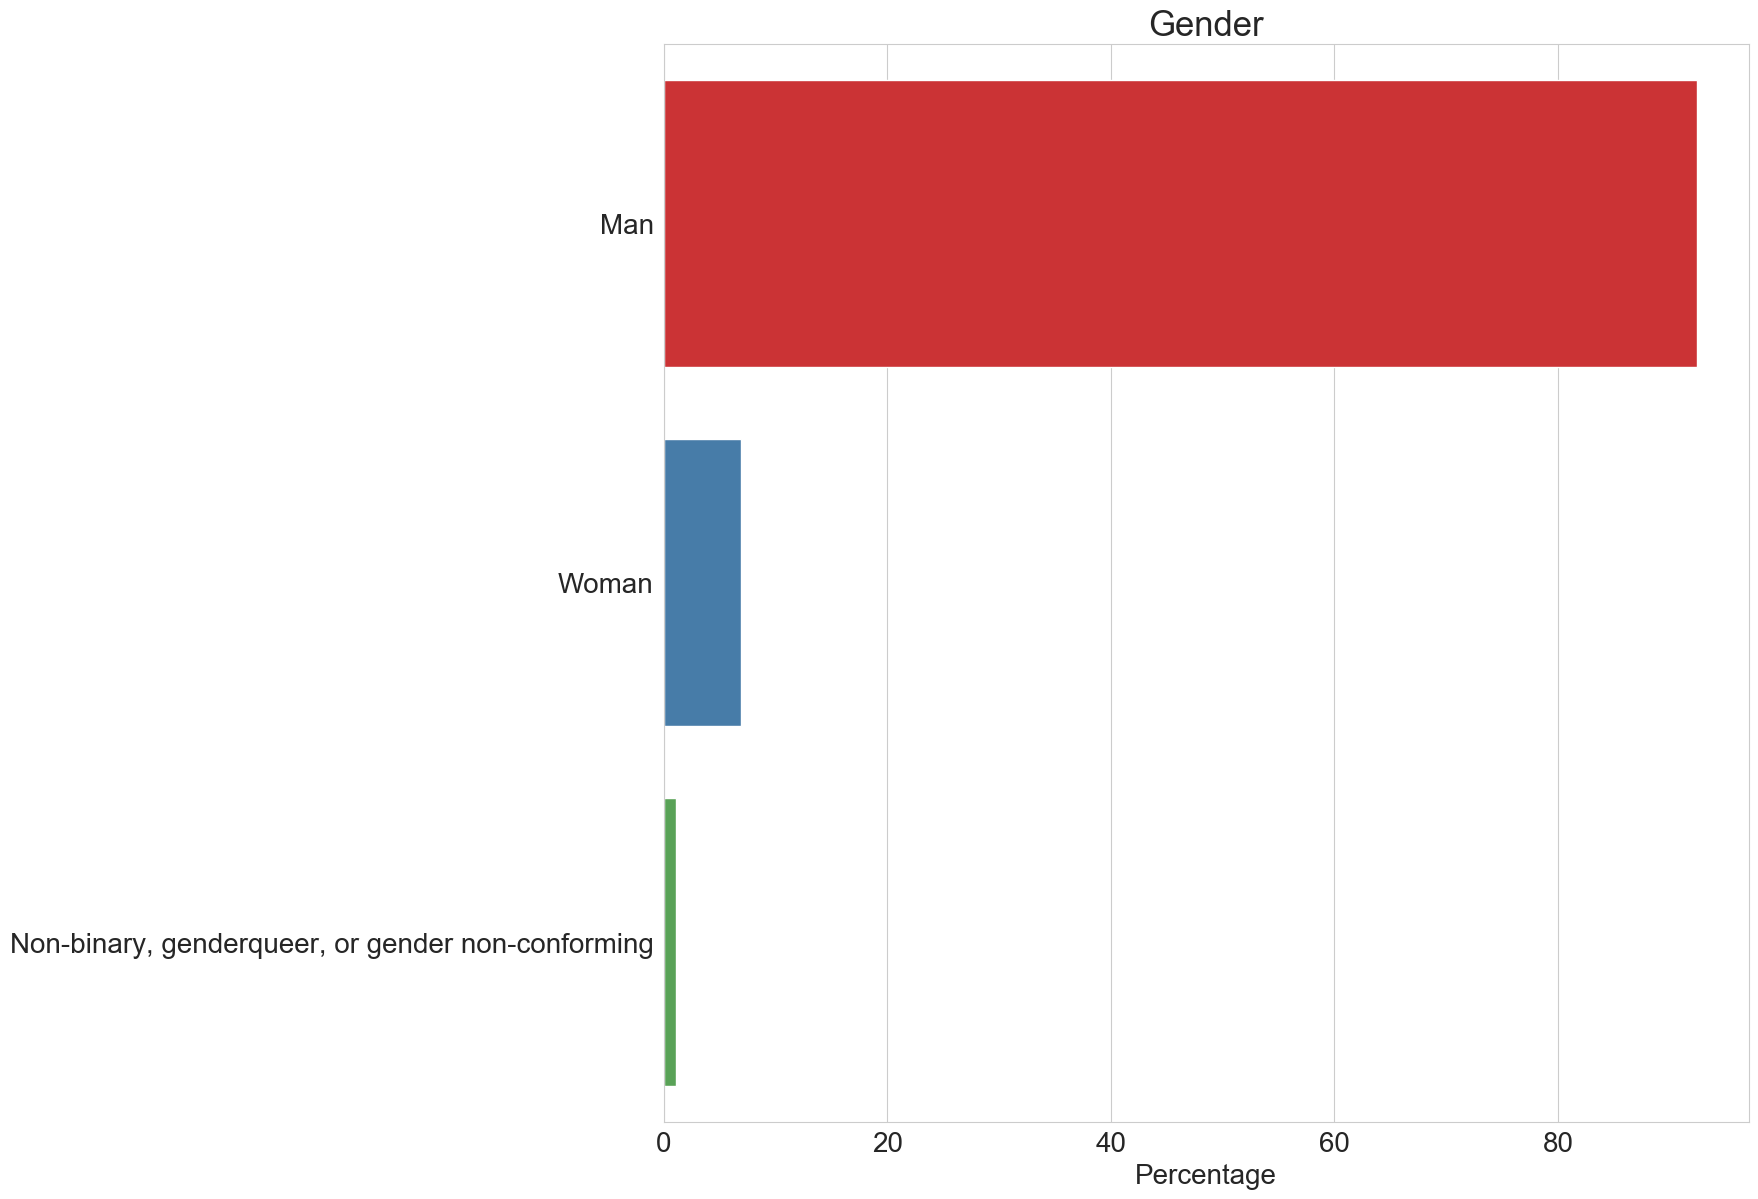

In [128]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x='percentage', y='index', data=gender_percent, ci=None, palette='Set1',orient='h')
ax.set_title('Gender', fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

Main Branch

In [132]:
mainbranch = newer_devsurvey_df['MainBranch'].value_counts(normalize=True)*100
mainbranch = mainbranch.to_frame(name='percentage').reset_index()
mainbranch

,index,percentage
0,I am a developer by profession,94.554592
1,"I am not primarily a developer, but I write co...",5.445408


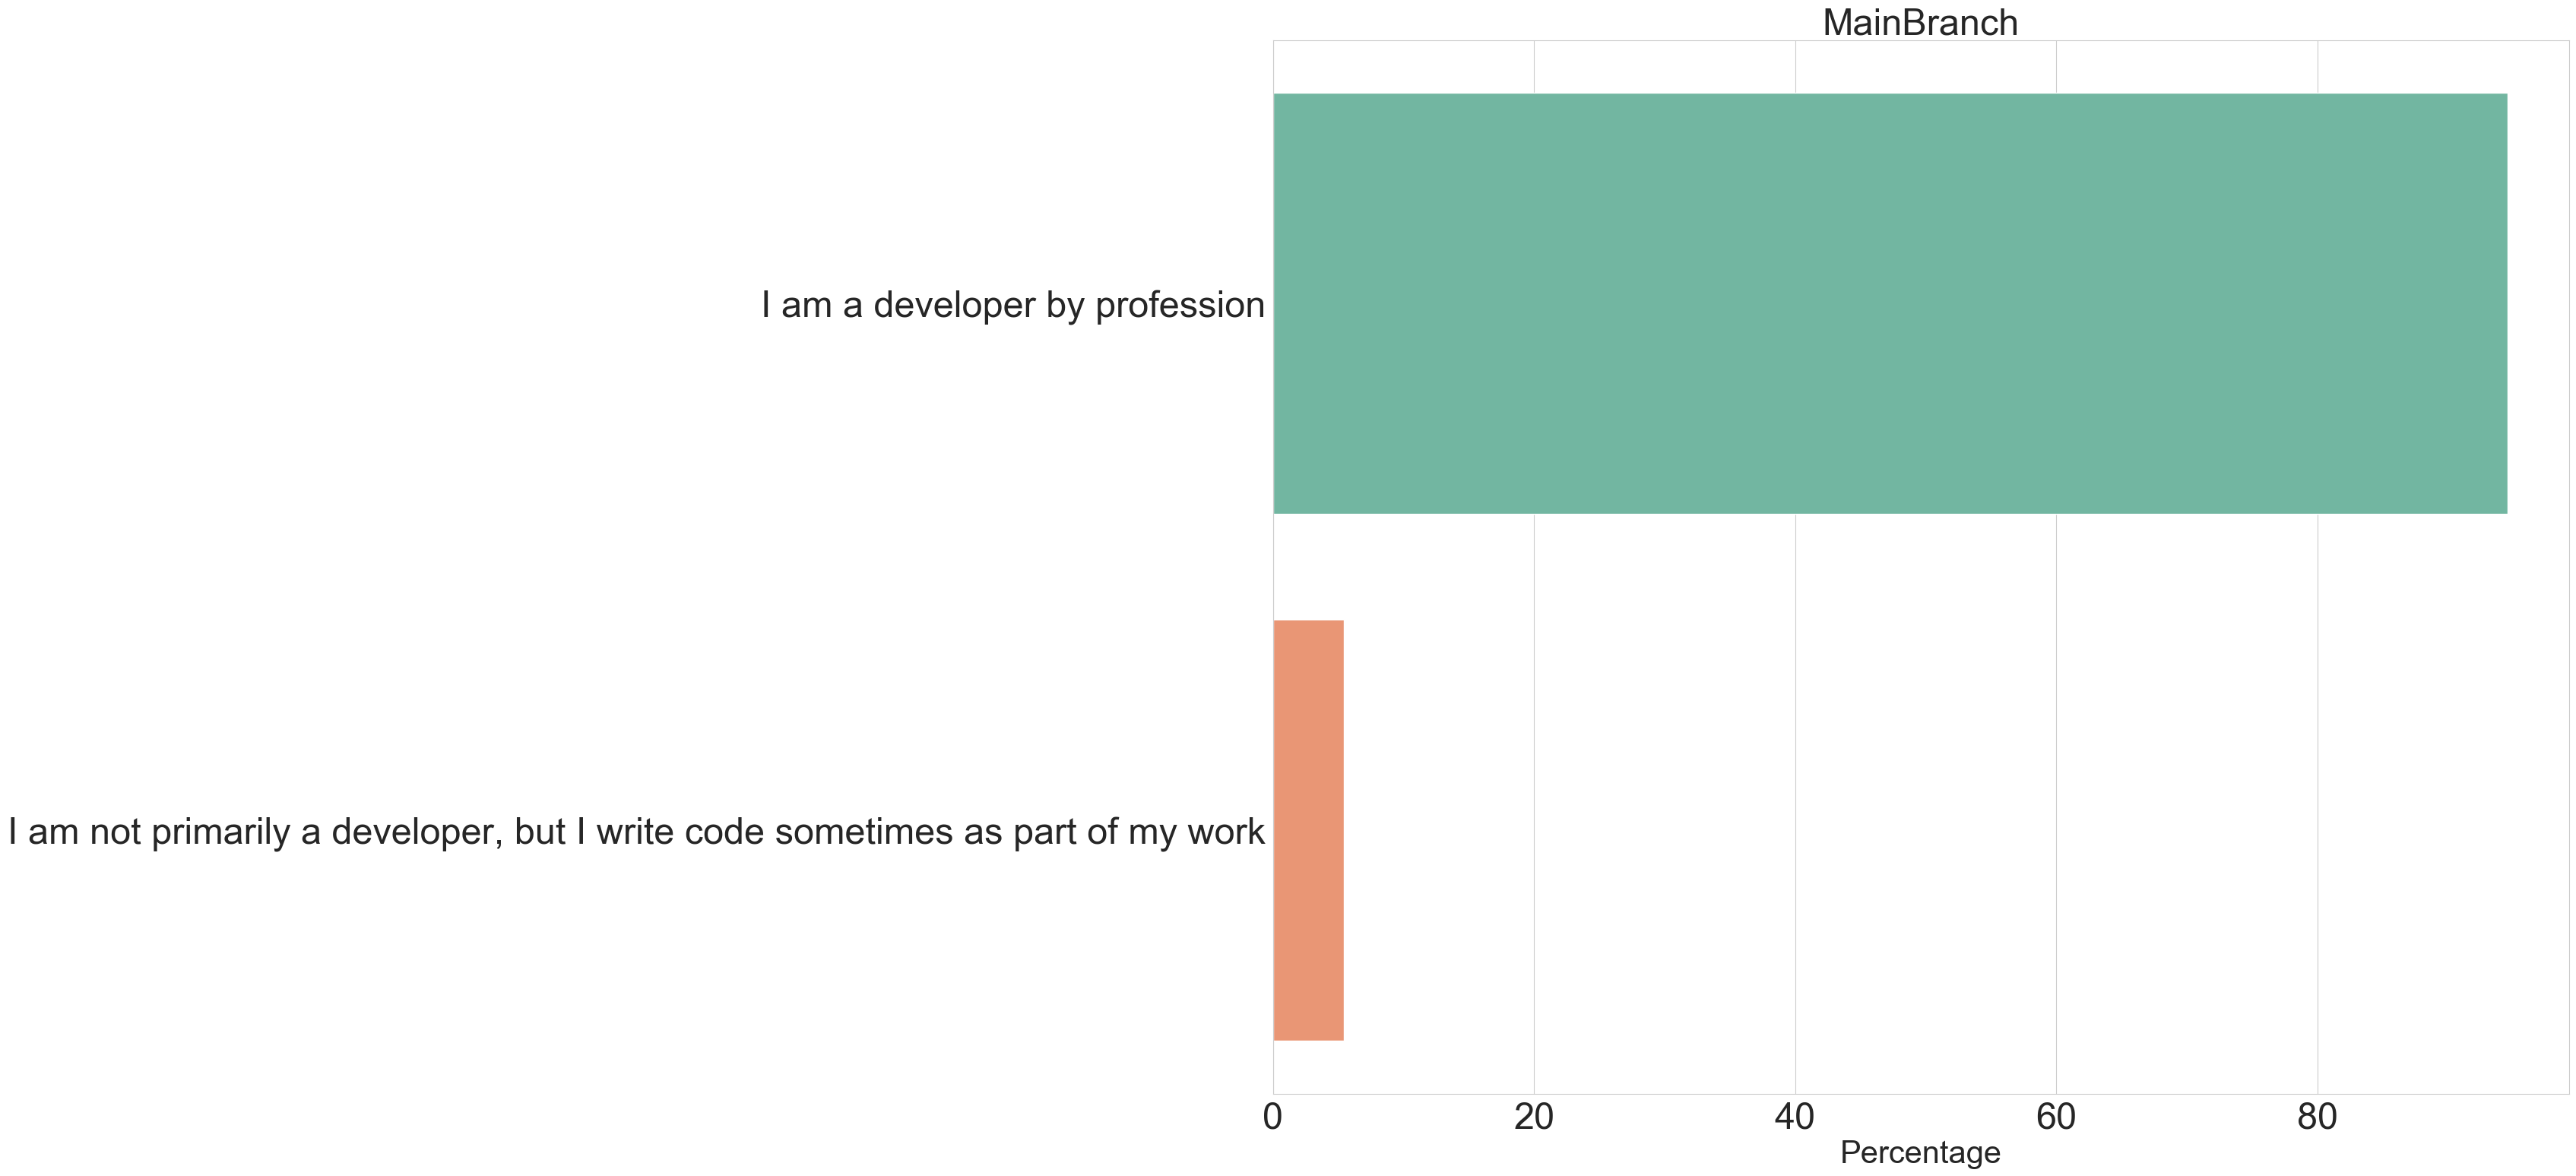

In [133]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(22,18))
ax = sns.barplot(x='percentage', y='index', data=mainbranch, ci=None, palette='Set2',orient='h')
ax.set_title('MainBranch', fontsize=35)
ax.set_xlabel ("Percentage", fontsize=30)
ax.set_ylabel (None, fontsize=40)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)

Developer Experience

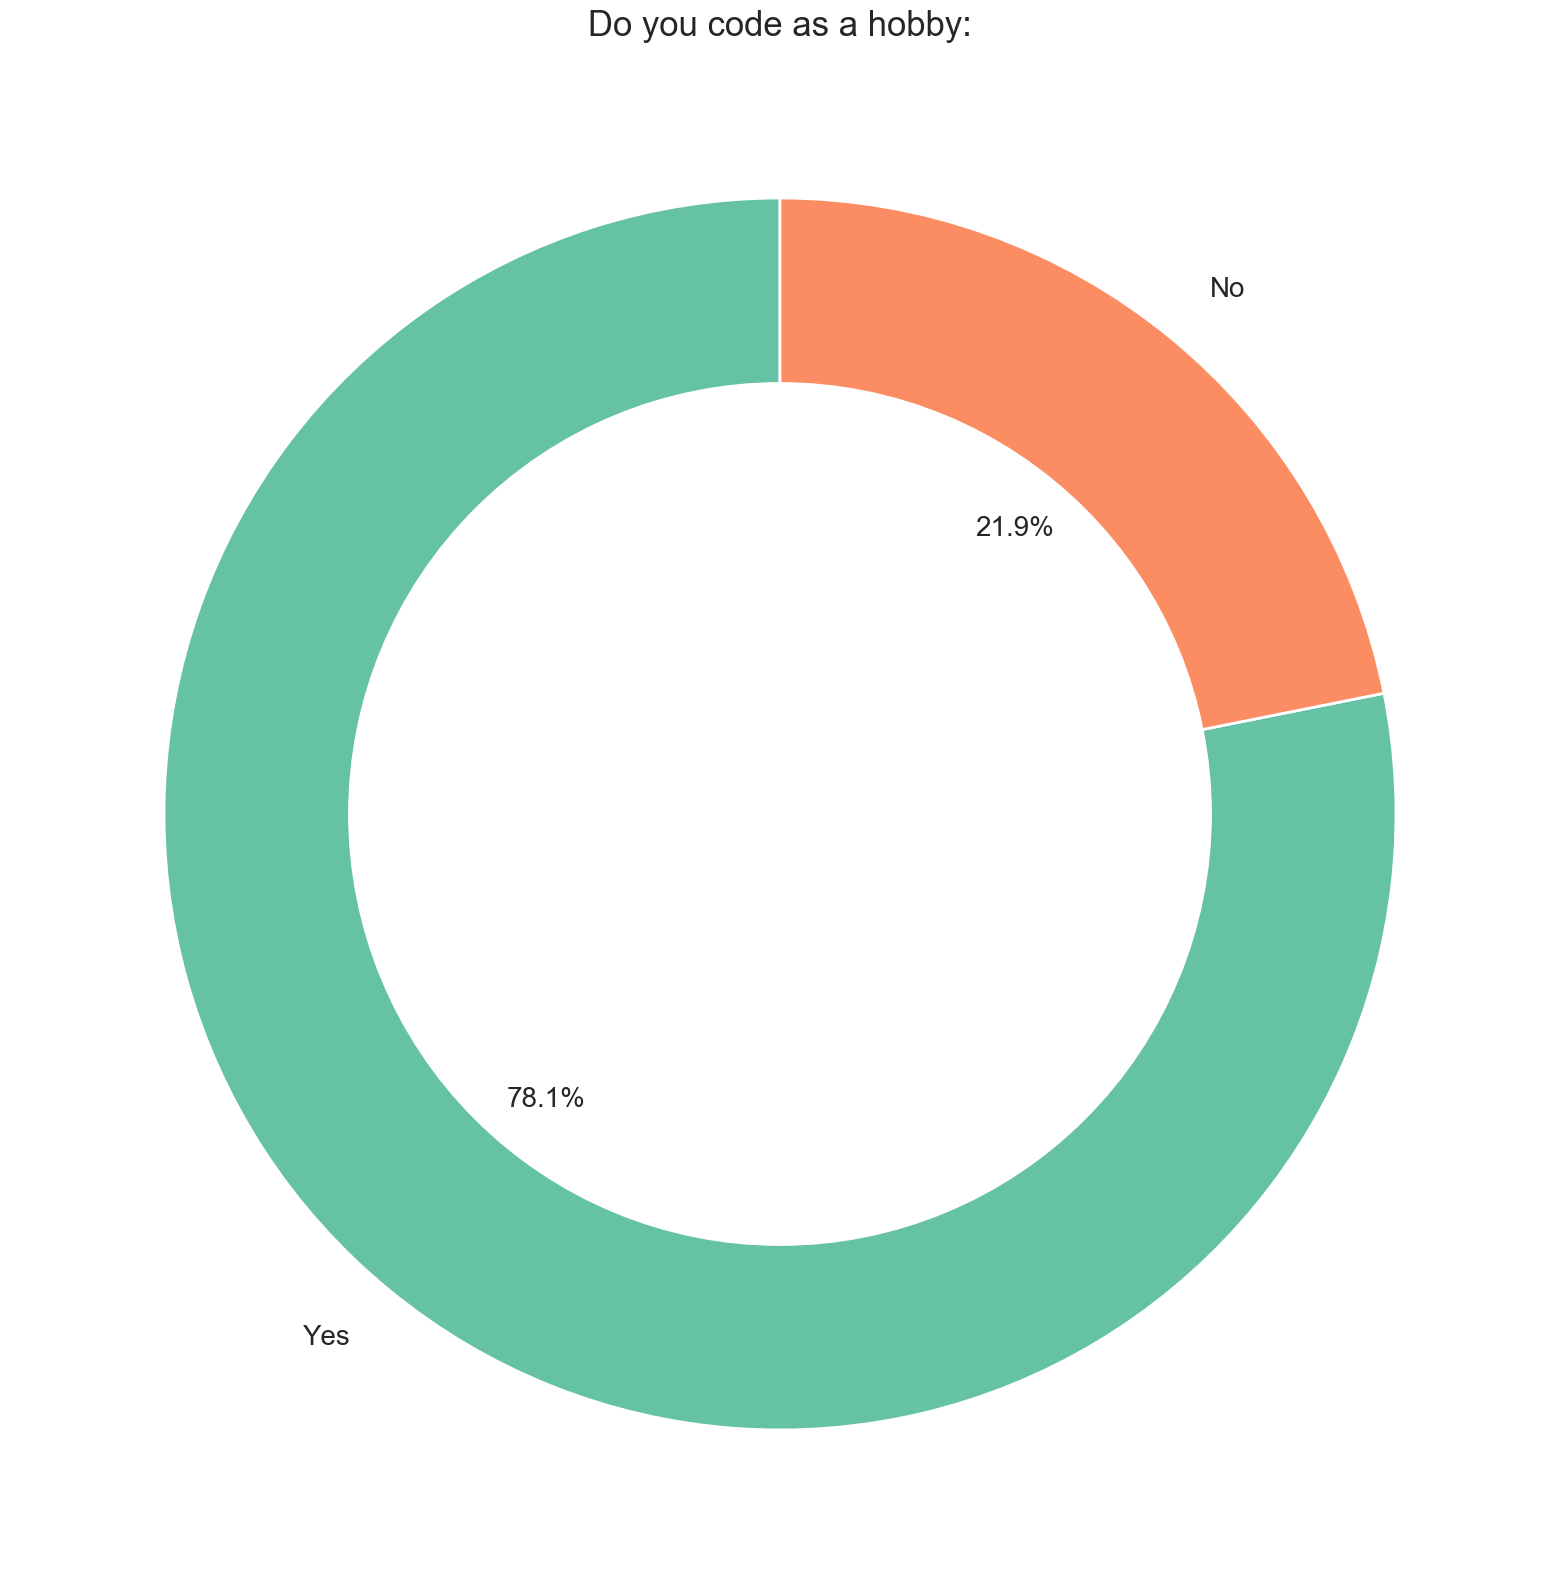

In [135]:
plt.subplots(figsize=(20,20))
data=newer_devsurvey_df["Hobbyist"]
data.value_counts().plot.pie(autopct='%1.1f%%',fontsize=20,colors=sns.color_palette('Set2',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title('Do you code as a hobby:', fontsize=25)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

Type of Developer

In [136]:
devtype = split_multicolumn(newer_devsurvey_df.DevType)
devtype

,"Developer, back-end","Developer, desktop or enterprise applications","Developer, game or graphics",Database administrator,"Developer, full-stack","Developer, mobile","Developer, embedded applications or devices","Developer, front-end","Developer, QA or test",DevOps specialist,...,"Engineer, data",Scientist,Educator,Product manager,Senior executive/VP,System administrator,Designer,"Engineer, site reliability",Marketing or sales professional,Academic researcher
7,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,True,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
13,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
15,True,True,False,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62016,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
62212,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63402,True,True,False,True,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
63517,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [137]:
devtype_percentage = devtype.mean().sort_values(ascending=False) * 100
devtype_percentage= devtype_percentage.to_frame(name='percentage').reset_index()
devtype_percentage

,index,percentage
0,"Developer, full-stack",69.724416
1,"Developer, back-end",63.743304
2,"Developer, front-end",42.022422
3,"Developer, desktop or enterprise applications",24.200585
4,"Developer, mobile",17.175678
5,DevOps specialist,15.546474
6,Database administrator,12.768543
7,System administrator,10.896338
8,Designer,9.079362
9,"Developer, QA or test",8.438725


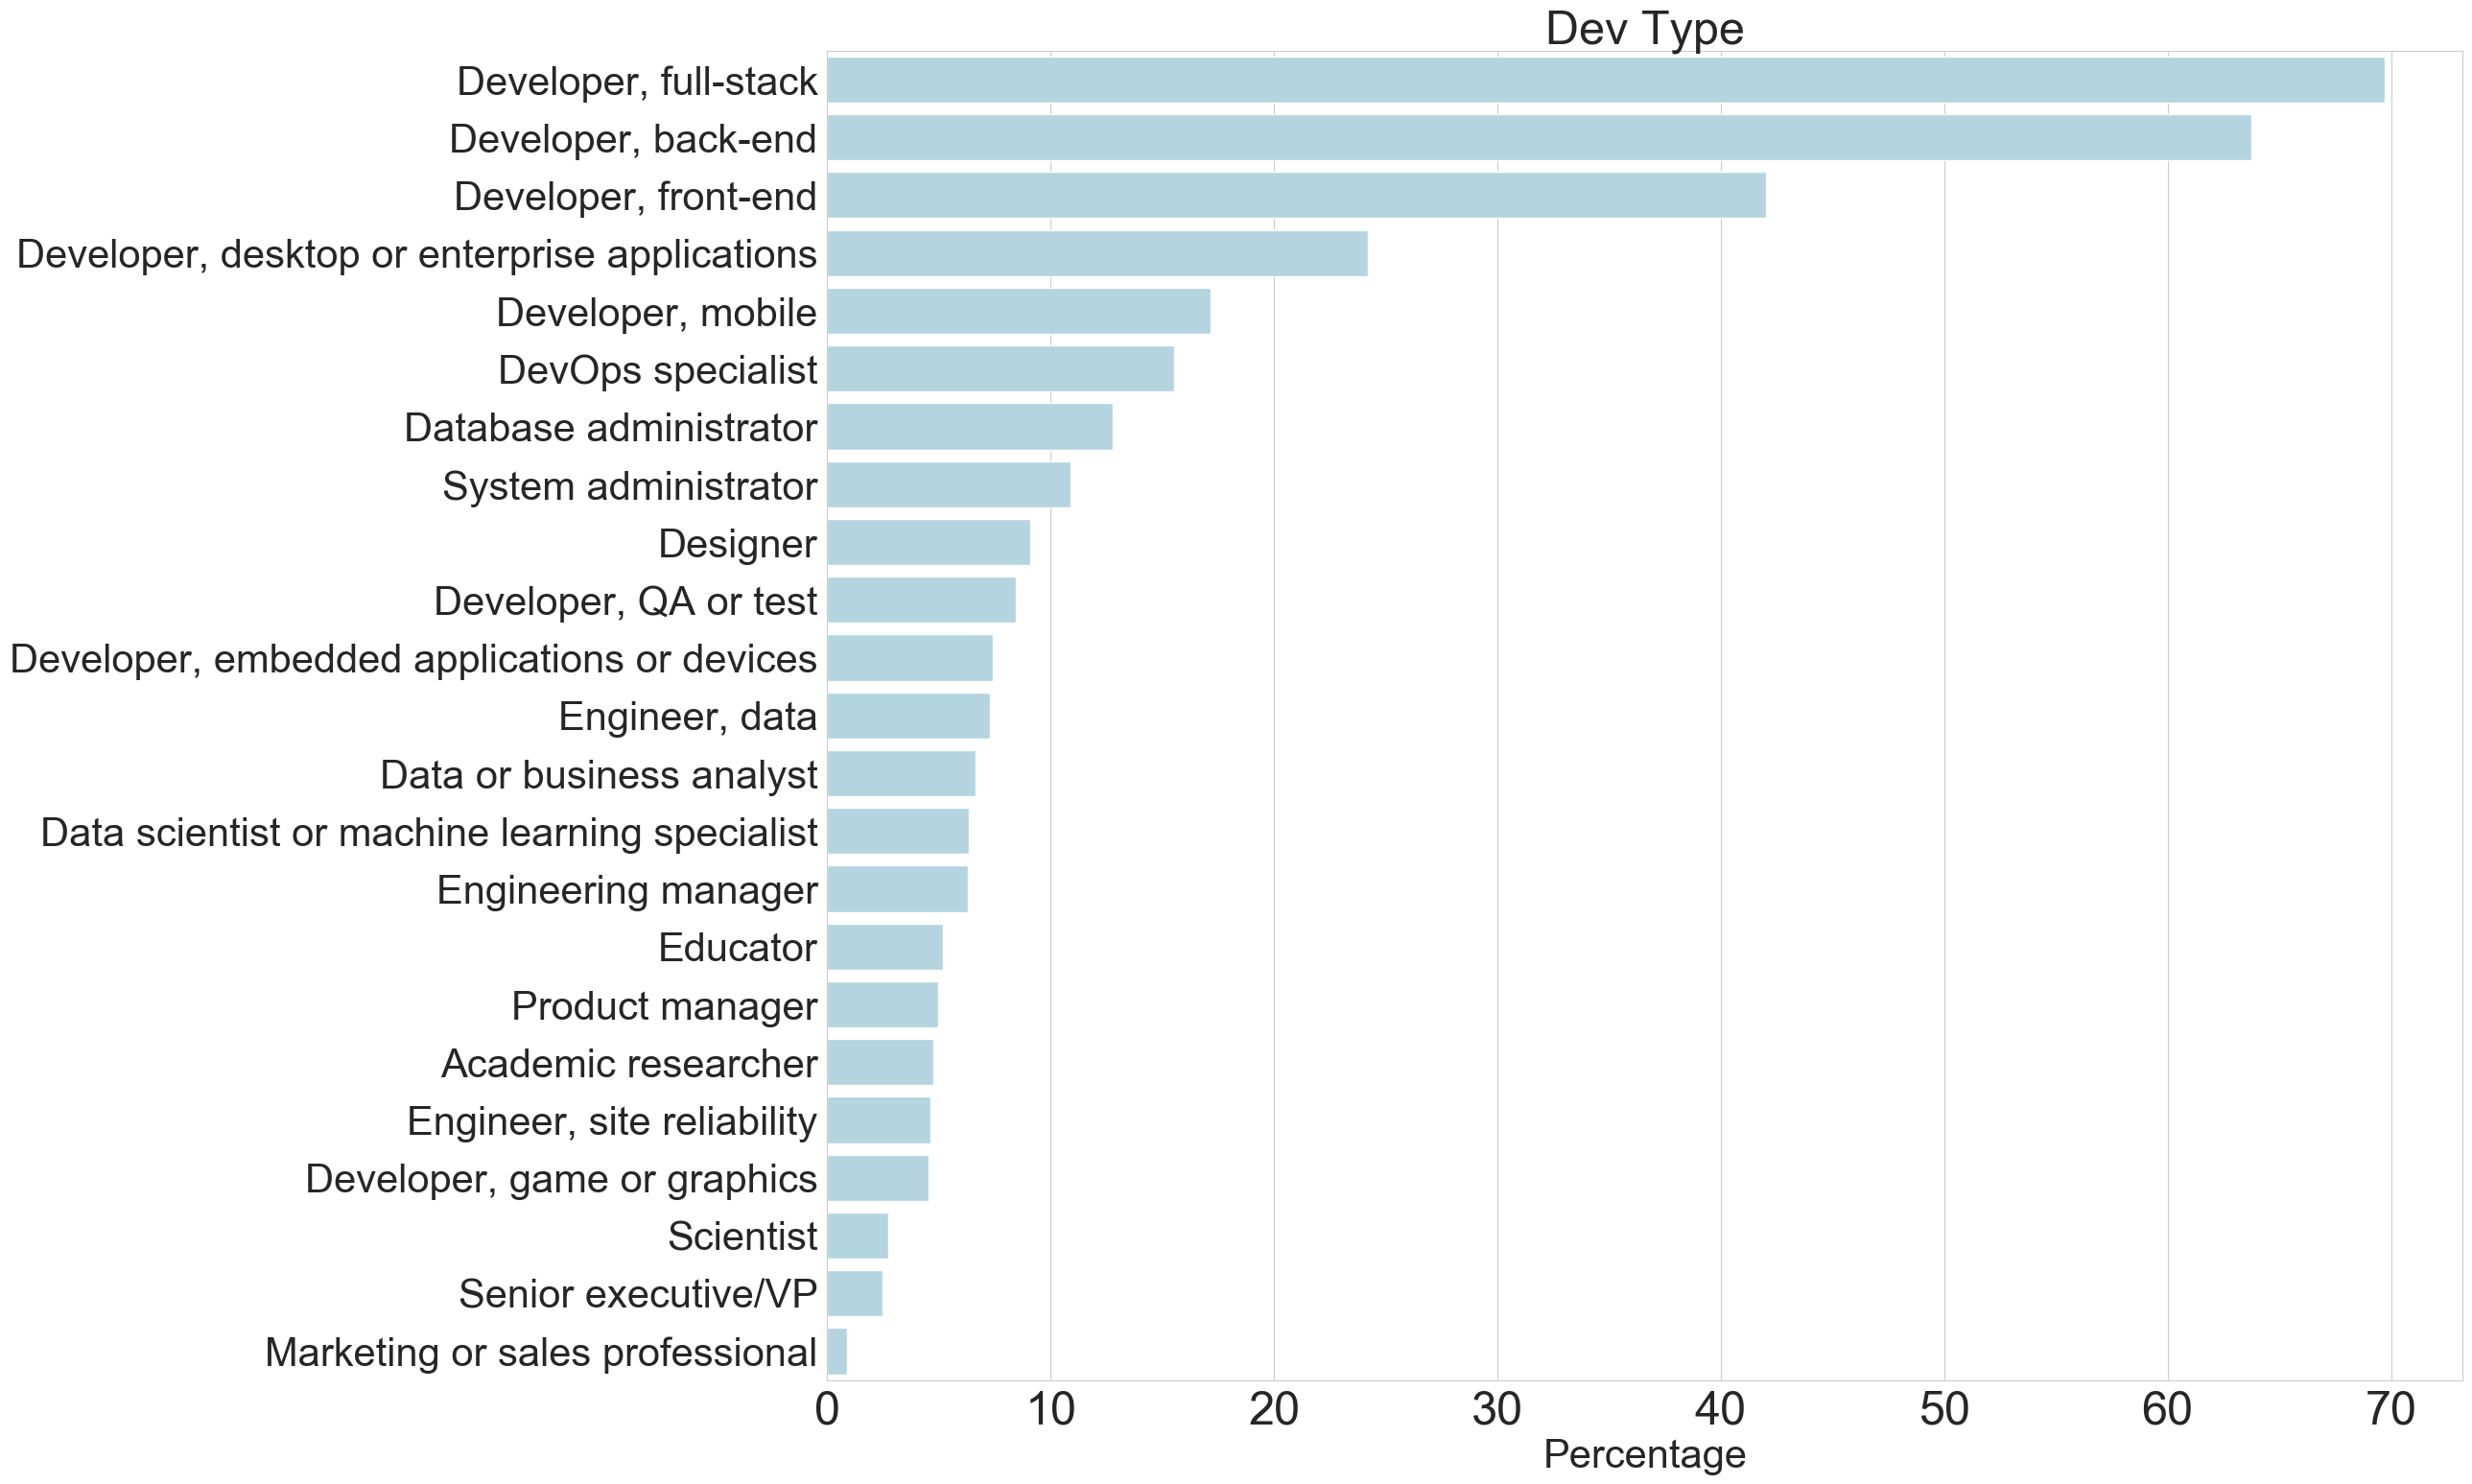

In [138]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(22,18))
ax = sns.barplot(x='percentage', y='index', data=devtype_percentage, ci=None, color='lightblue',orient='h')
ax.set_title('Dev Type', fontsize=35)
ax.set_xlabel ("Percentage", fontsize=30)
ax.set_ylabel (None, fontsize=40)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

Education

In [139]:
education=newer_devsurvey_df['EdLevel'].value_counts(normalize=True)*100
education=education.to_frame(name='percentage').reset_index()
education

,index,percentage
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",54.293919
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24.178495
2,Some college/university study without earning ...,14.082951
3,"Associate degree (A.A., A.S., etc.)",3.893522
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",1.999227
5,"Professional degree (JD, MD, etc.)",1.551886


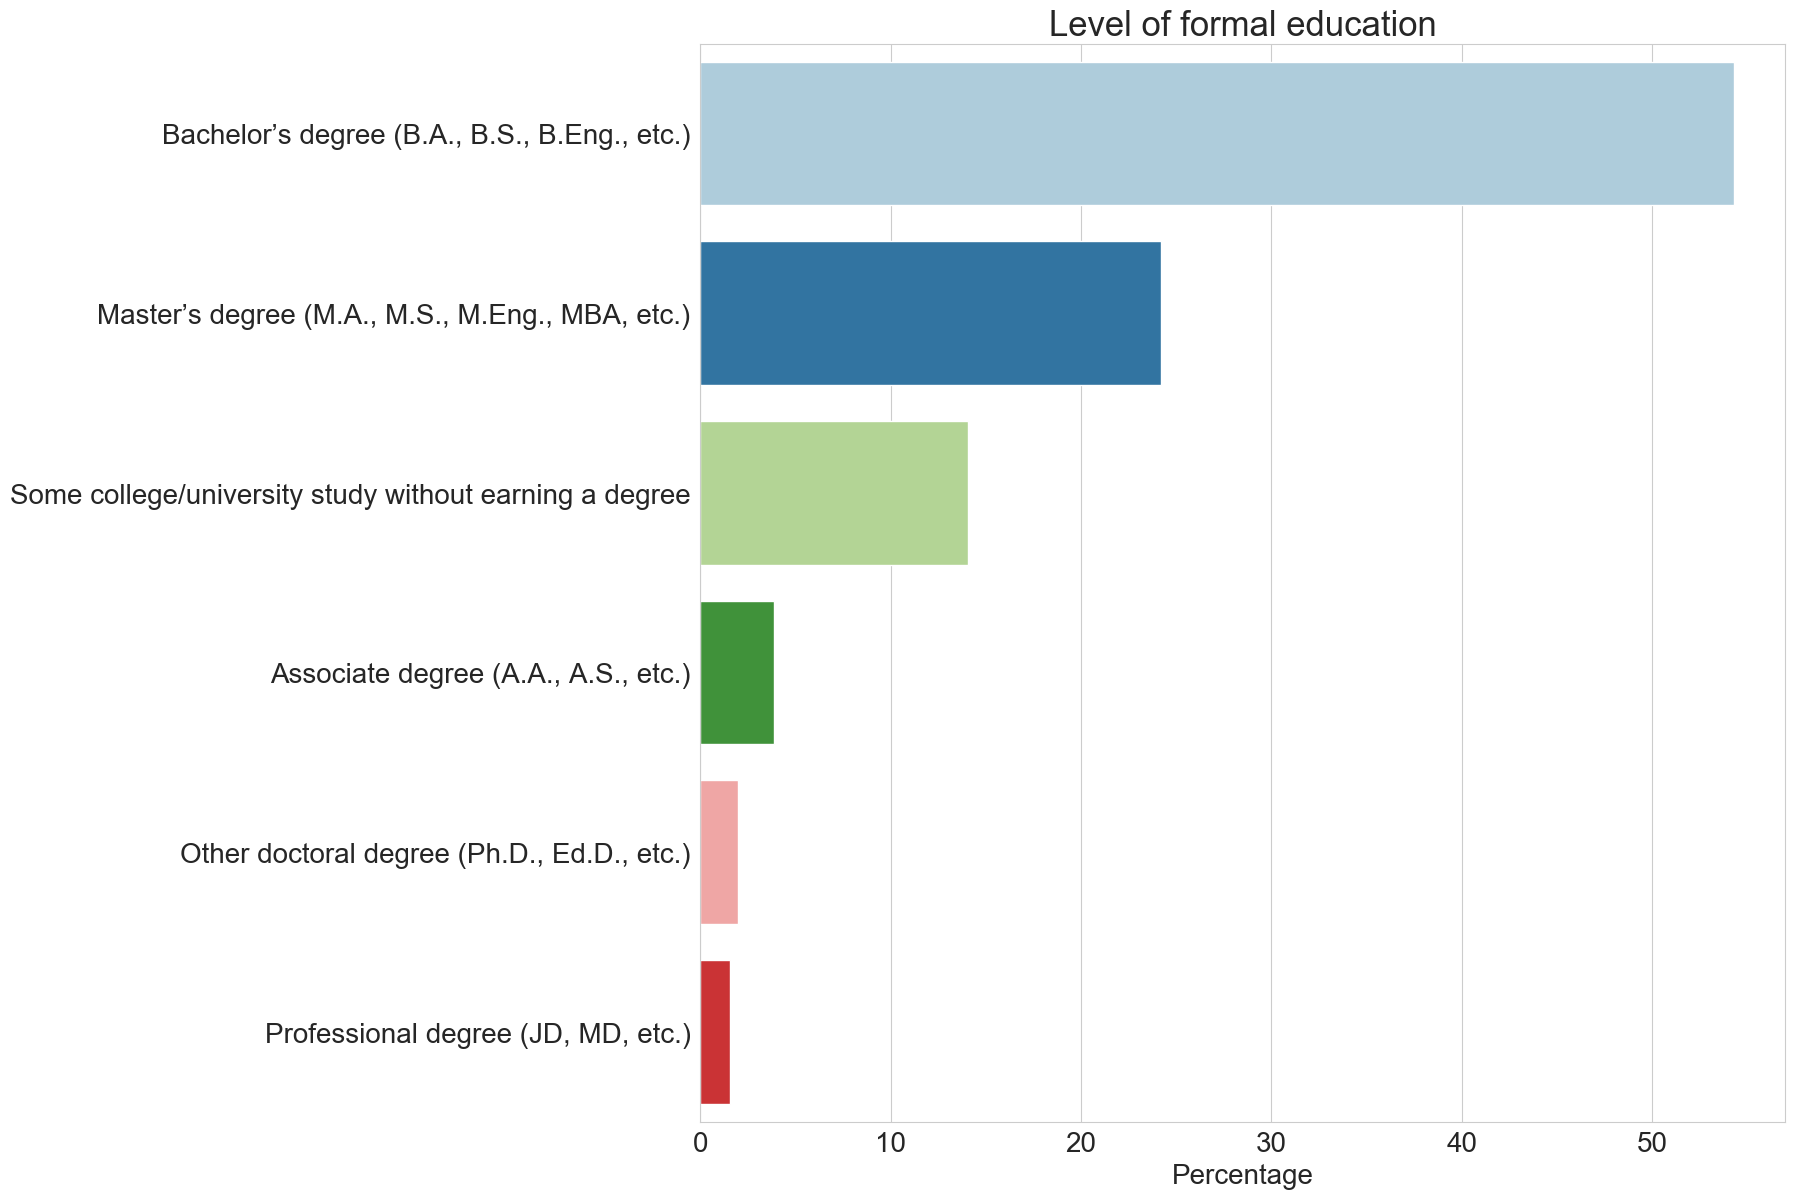

In [140]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x='percentage', y='index', data=education, ci=None, palette='Paired',orient='h')
ax.set_title('Level of formal education', fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

Major

In [142]:
study=newer_devsurvey_df['UndergradMajor'].value_counts(normalize=True)*100
study=study.to_frame(name='percentage').reset_index()
study

,index,percentage
0,"Computer science, computer engineering, or sof...",64.389463
1,"Information systems, information technology, o...",8.565748
2,"Another engineering discipline (such as civil,...",7.654498
3,"A natural science (such as biology, chemistry,...",3.573204
4,Web development or web design,3.214227
5,Mathematics or statistics,3.087204
6,"A business discipline (such as accounting, fin...",2.711658
7,"A humanities discipline (such as literature, h...",2.302977
8,"A social science (such as anthropology, psycho...",1.789363
9,Fine arts or performing arts (such as graphic ...,1.712045


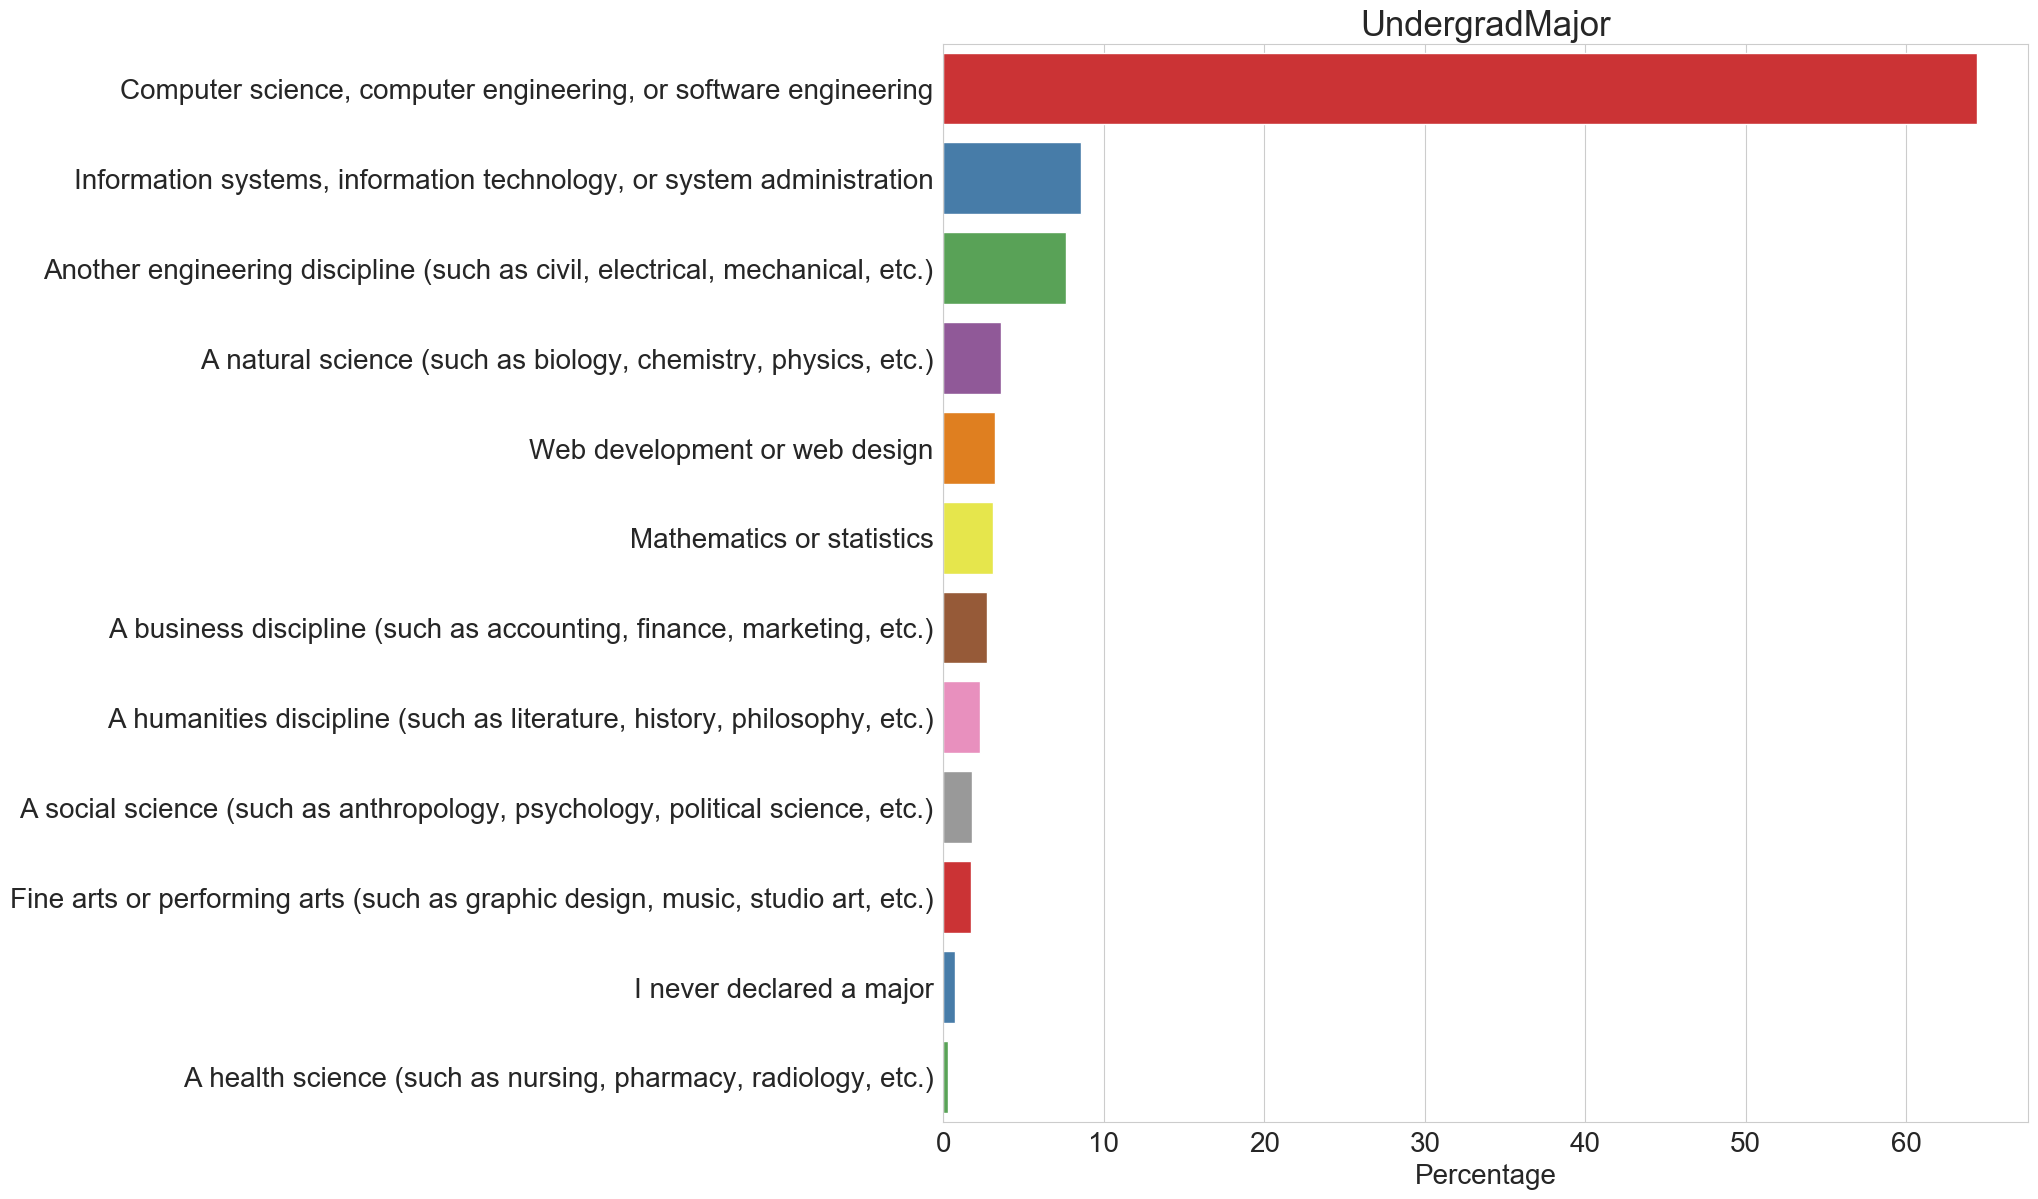

In [143]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x='percentage', y='index', data=study, ci=None, palette='Set1',orient='h')
ax.set_title('UndergradMajor', fontsize=25)
ax.set_xlabel ("Percentage", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

Webframe Worked with

In [162]:
webframe = split_multicolumn(newer_devsurvey_df.WebframeWorkedWith)
webframe

,Flask,jQuery,Angular,Angular.js,Django,React.js,Vue.js,ASP.NET,Gatsby,ASP.NET Core,Express,Spring,Ruby on Rails,Laravel,Symfony,Drupal
7,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False
13,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
15,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62016,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
62212,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
63402,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False
63517,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False


In [163]:
webframe_percent = webframe.mean().sort_values(ascending=False) * 100
webframe_percent= webframe_percent.to_frame(name='percentage').reset_index()
webframe_percent

,index,percentage
0,jQuery,41.790468
1,React.js,37.339151
2,Angular,26.404153
3,ASP.NET,24.421494
4,ASP.NET Core,22.256586
5,Express,21.383995
6,Spring,18.545314
7,Vue.js,18.164246
8,Angular.js,16.325178
9,Flask,14.127133


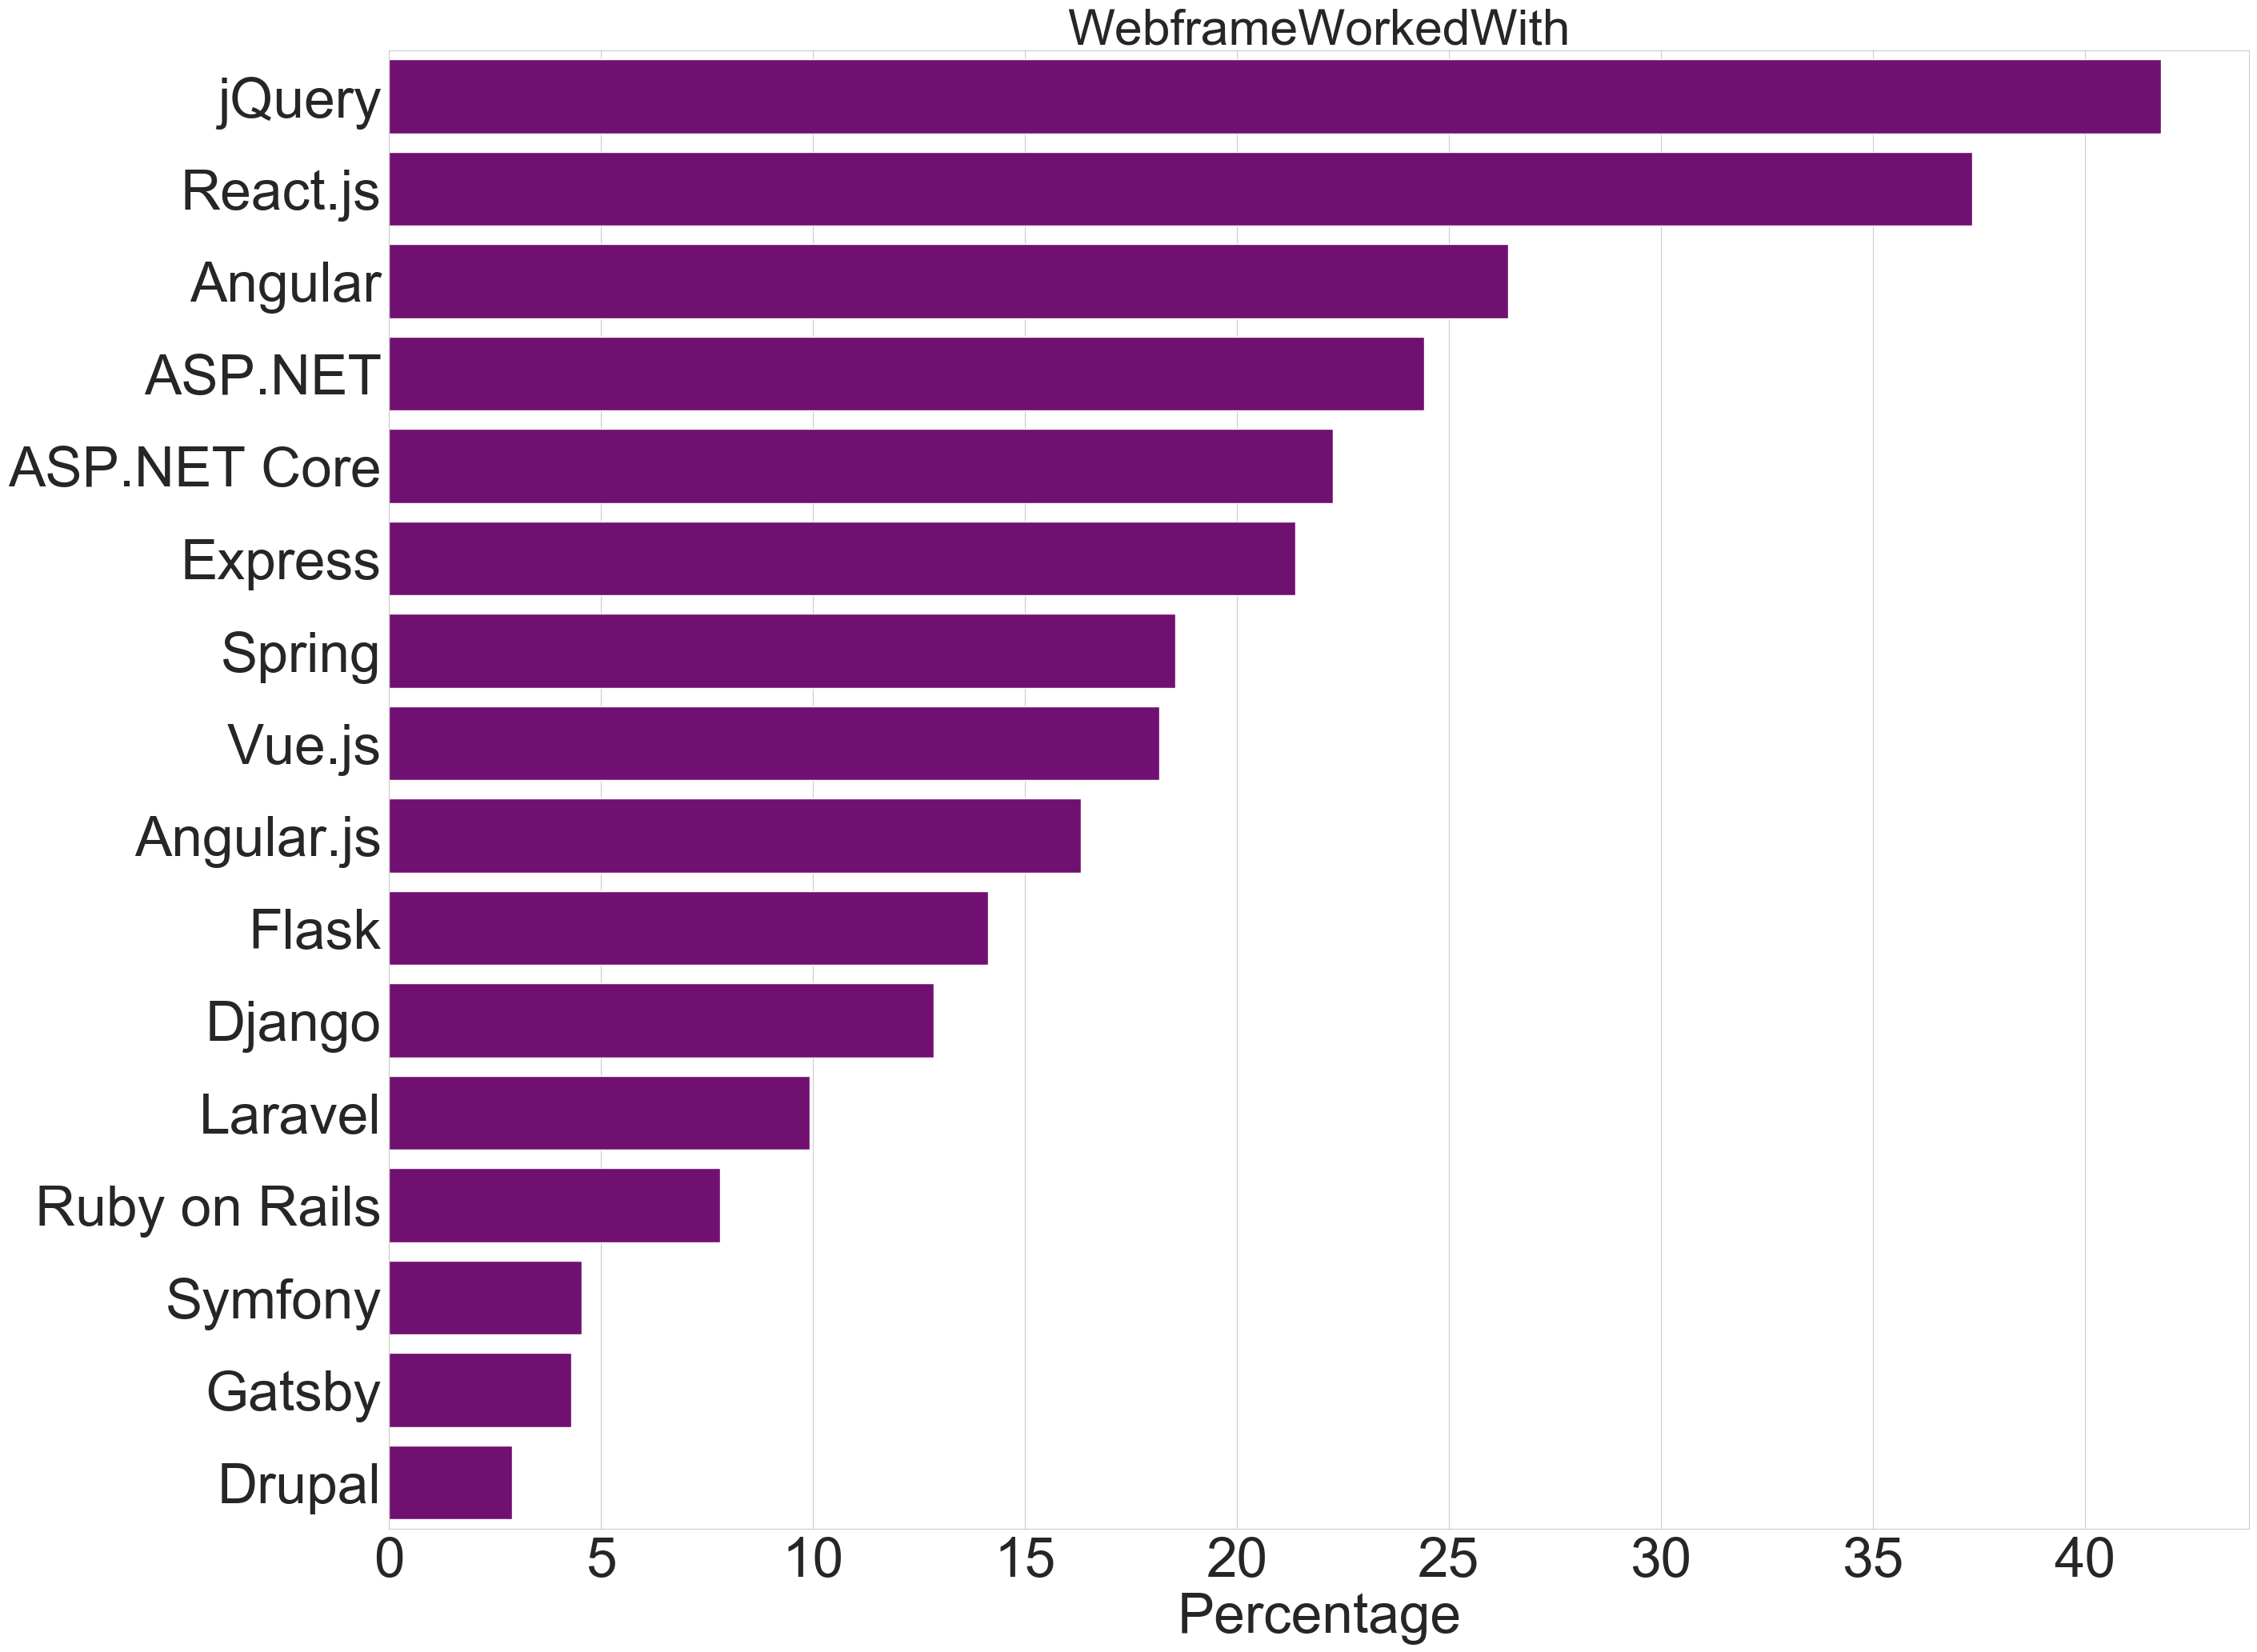

In [167]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,24))
ax = sns.barplot(x='percentage', y='index', data=webframe_percent, ci=None, color='purple',orient='h')
ax.set_title('WebframeWorkedWith', fontsize=45)
ax.set_xlabel ("Percentage", fontsize=50)
ax.set_ylabel (None, fontsize=50)
ax.tick_params(axis='x', labelsize=50)
ax.tick_params(axis='y', labelsize=50)